In [50]:
import pandas as pd
import numpy as np
from config import DATA_PATH, FEATURES, TARGET
from features import FEATURE_DICT
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [11]:
df =pd.read_csv(DATA_PATH)
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
N = 10
mu, sigma = 0, 1 # mean and standard deviation
df = pd.DataFrame({'col1': [np.random.normal(mu, sigma) for _ in range(N)], 
                   'col2': [np.random.normal(mu, sigma) for _ in range(N)], 
                   'col3': [np.random.normal(mu, sigma) for _ in range(N)], 
                   'col4': [np.random.normal(mu, sigma) for _ in range(N)], 
                   'col5': [np.random.normal(mu, sigma) for _ in range(N)], 
                   'col6': np.random.poisson(5, N),
                   'target': np.random.binomial(1, 0.3, N)})
df.head(5)

,col1,col2,col3,col4,col5,col6,target
0,-0.782650,1.003392,0.323733,-1.540231,-0.696880,5,0
1,0.407118,-0.226737,-2.357575,0.151608,-0.822054,5,0
2,-0.510918,-0.813867,0.589146,1.738201,0.914053,2,0
3,0.731513,-1.278745,0.914788,-0.438672,-0.386796,7,0
4,0.459456,-0.804256,0.950982,0.011637,-0.058903,3,1


In [15]:
#x_df = sm.add_constant(df)
df['constant'] = 1
df

,col1,col2,col3,col4,col5,col6,target,constant
0,-0.782650,1.003392,0.323733,-1.540231,-0.696880,5,0,1
1,0.407118,-0.226737,-2.357575,0.151608,-0.822054,5,0,1
2,-0.510918,-0.813867,0.589146,1.738201,0.914053,2,0,1
3,0.731513,-1.278745,0.914788,-0.438672,-0.386796,7,0,1
4,0.459456,-0.804256,0.950982,0.011637,-0.058903,3,1,1
5,-1.461730,-0.475665,-0.962477,-1.378721,-0.301203,7,0,1
6,0.977456,-1.113165,1.883959,0.275236,0.022056,2,1,1
7,0.673533,0.002565,0.225220,0.513810,-1.323023,7,0,1
8,-1.718167,1.568994,0.142410,-0.426933,-0.634829,6,1,1
9,-0.047650,0.371422,0.739595,-0.241913,0.945050,8,1,1


In [28]:
~df.columns.isin(['target'])

array([ True,  True,  True,  True,  True,  True, False,  True])

In [34]:
df.columns[~df.columns.isin(['target'])]

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'constant'], dtype='object')

In [31]:
model = sm.OLS(df.target, df[df.columns[~df.columns.isin(['target'])]])

In [35]:
results = model.fit()

In [36]:
results.params

col1        0.206291
col2        0.335769
col3        0.149232
col4       -0.108327
col5        0.296729
col6       -0.047425
constant    0.750626
dtype: float64

In [37]:
results.summary()

C:\dev\virtual\gcp_prep\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                 -0.602
Method:                 Least Squares   F-statistic:                    0.4364
Date:                Tue, 06 Sep 2022   Prob (F-statistic):              0.822
Time:                        22:41:33   Log-Likelihood:                -3.9166
No. Observations:                  10   AIC:                             21.83
Df Residuals:                       3   BIC:                             23.95
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
col1           0.2063      0.365      0.565      0.612      -0.956       1.369
col2           0.3358      0.350      0.960      0.408      -0.777       1.449
col3           0.1492      0.230      0.649      0.563      -0.583       0.882
col4          -0.1083      0.315     -0.344      0.753      -1.110       0.893
col5           0.2967      0.397      0.747      0.509      -0.968       1.562
col6          -0.0474      0.124     -0.381      0.728      -0.443       0.349
constant       0.7506      0.733      1.024      0.381      -1.582       3.084
==============================================================================
Omnibus:                        0.729   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.592
Skew:                          -0.481   Prob(JB):                        0.744
Kurtosis:                       2.295   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Read your p-value first. If the p-value is small (less than your alpha level), you can reject the null hypothesis. Only then should you consider the f-value. If you don’t reject the null, ignore the f-value.

if you want to know whether your regression F-value is significant, ind the critical value in the f-table. For example, let’s say you had 3 regression degrees of freedom (df1) and 120 residual degrees of freedom (df2). An F statistic of at least 3.95 is needed to reject the null hypothesis at an alpha level of 0.1. At this level, you stand a 1% chance of being wrong. F Values will range from 0 to an arbitrarily large number.

The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data.

In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting.

As an example, suppose that there are three candidate models, whose AIC values are 100, 102, and 110. Then the second model is exp((100 − 102)/2) = 0.368 times as probable as the first model to minimize the information loss. Similarly, the third model is exp((100 − 110)/2) = 0.007 times as probable as the first model to minimize the information loss.

In this example, we would omit the third model from further consideration

Like skewness, kurtosis describes the shape of a probability distribution 

D: Laplace distribution, also known as the double exponential distribution, red curve (two straight lines in the log-scale plot), excess kurtosis = 3
S: hyperbolic secant distribution, orange curve, excess kurtosis = 2
L: logistic distribution, green curve, excess kurtosis = 1.2
N: normal distribution, black curve (inverted parabola in the log-scale plot), excess kurtosis = 0
C: raised cosine distribution, cyan curve, excess kurtosis = −0.593762...
W: Wigner semicircle distribution, blue curve, excess kurtosis = −1
U: uniform distribution, magenta curve (shown for clarity as a rectangle in both images), excess kurtosis = −1.2.

In [39]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [51]:
model = LogisticRegression()

In [52]:
model.fit(x_values, df.target)

LogisticRegression()

In [53]:
y_predict = model.predict(x_values)

In [54]:
y_predict

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

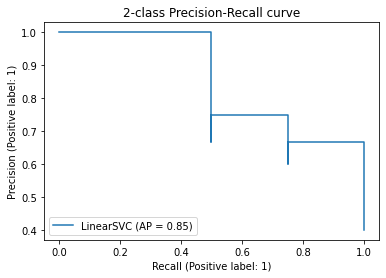

In [59]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    model, x_values , df.target, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [68]:
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    average_precision_score,
    make_scorer,
)
for metric in [precision_score, recall_score, f1_score]:
        print(f"{metric.__name__} + : {metric(df.target, y_predict):.2}")


precision_score + : 0.75
recall_score + : 0.75
f1_score + : 0.75
